# Day 3 warmpup Solutions

The first exercise is to subset the `SAFI_clean` data set to keep only every fourth value

In [1]:
# %load warmup/day3_1
# Day 3 warmup, part 1

#  import the pandas library
import pandas as pd

# load the SAFI_clean data set
data_folder = 'data'
clean_file = 'SAFI_clean.csv'
# remember from day 1, how we can combine strings
safi = pd.read_csv(data_folder + '/' + clean_file)

In [2]:
safi.head()

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [3]:
# get the length of the dataset
num_safi_responses = len(safi)

In [4]:
# create dataframe with every 4th response from the dataset
# remember from day 1 how we made lists of numbers
fourth_sample_list = list(range(0,num_safi_responses,4))

In [5]:
# what function, and brackets and parameter?
safi_subset = safi.iloc[fourth_sample_list]

In [6]:
safi_subset.head()

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d
8,9,Chirodzo,2016-11-16T00:00:00Z,8,6,burntbricks,1,no,never,3,television;solar_panel;solar_torch,3,Jan;Dec,uuid:846103d2-b1db-4055-b502-9cd510bb7b37
12,13,God,2016-11-21T00:00:00Z,6,8,burntbricks,1,no,never,3,bicycle;radio;cow_plough;mobile_phone,2,Sept;Oct;Nov,uuid:6c00c145-ee3b-409c-8c02-2c8d743b6918
16,17,God,2016-11-21T00:00:00Z,8,20,sunbricks,1,NaN,NaN,1,mobile_phone,2,Nov;Dec,uuid:4707f3dc-df18-4348-9c2c-eec651e89b6b


# Warm up 2

Next, examine the SAFI crops dataset to see how land compares by farmer and by crop

In [7]:
# %load warmup/day3_2
# load in the data file SAFI_crops
SAFI_crops = pd.read_csv('data/SAFI_crops.csv')

# look at the first few rows of  that data
SAFI_crops.head()

,Farm,plot_no,plot_area,crop_no,crop_name
0,1,1,0.5,1,maize
1,1,2,0.5,1,maize
2,1,1,1.0,1,maize
3,1,2,1.5,1,tomatoes
4,1,3,1.0,1,vegetable


In [8]:
# filter the data to look at only the plots with maize

maize_farms = SAFI_crops[SAFI_crops['crop_name'] =='maize']

# save that to a separate.csv
maize_farms.to_csv('data/maize_farms.csv')

In [9]:
# sum to total area of crops per farm
crops_per_farm = SAFI_crops.groupby('Farm')
crops_per_farm['plot_area'].sum().head()

Farm
1    4.5
3    1.0
4    3.0
5    2.0
6    1.5
Name: plot_area, dtype: float64

In [10]:
# sum the total area of land per crop, across all farmers
land_per_crop = SAFI_crops.groupby('crop_name')
land_per_crop['plot_area'].sum()

crop_name
amendoim        2.0
baby_corn      26.5
bananas         6.0
beans          64.0
cabbage         9.7
cucumber        3.5
maize         538.0
ngogwe          0.5
onion          25.3
other           9.8
peanut         22.0
pigeonpeas      1.0
piri_piri      28.5
potatoes        2.0
sesame          2.0
sorghum        64.0
sunflower       0.5
tomatoes      124.2
vegetable      75.8
Name: plot_area, dtype: float64

# Bonus

we can plot the stats we just produced

In [13]:
%matplotlib inline

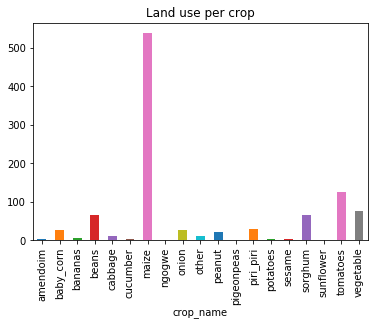

In [16]:
land_per_crop['plot_area'].sum().plot(kind='bar',title='Land use per crop');

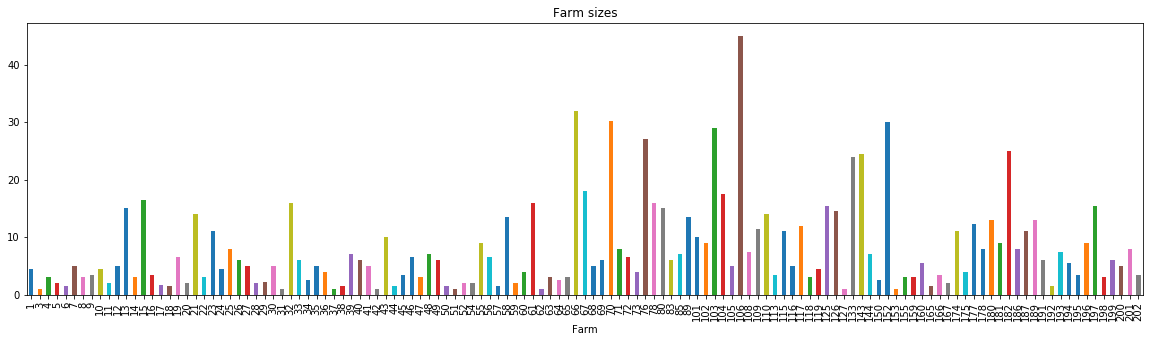

In [22]:
crops_per_farm['plot_area'].sum().plot(kind='bar',title='Farm sizes',figsize =(20,5))

The plot above is hard to read but making the width more than 20 makes it hard to see too, however, making it tall would work, the `barh` plot type allows that.  

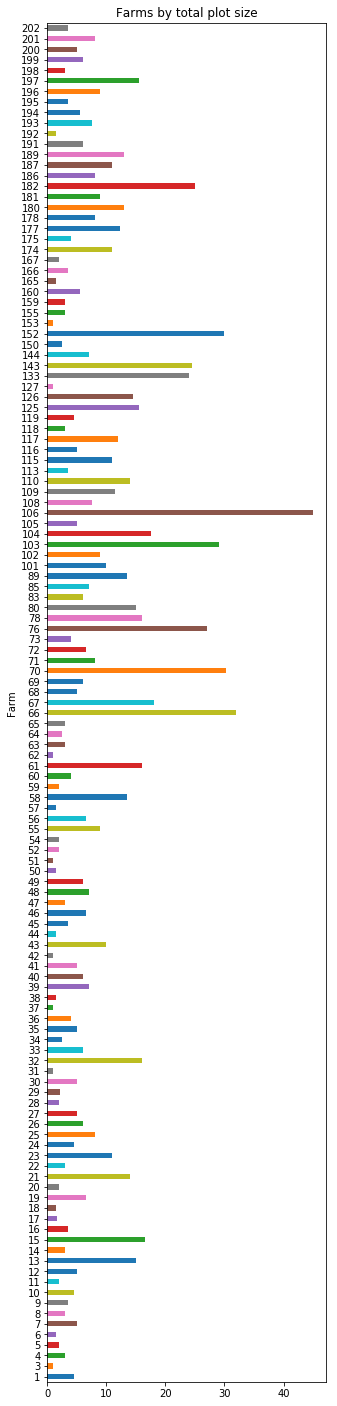

In [26]:
crops_per_farm['plot_area'].sum().plot(kind='barh',figsize=(5,25), title='Farms by total plot size')

Pandas provides a `sort_values` function and we can plot the result after applying that as well

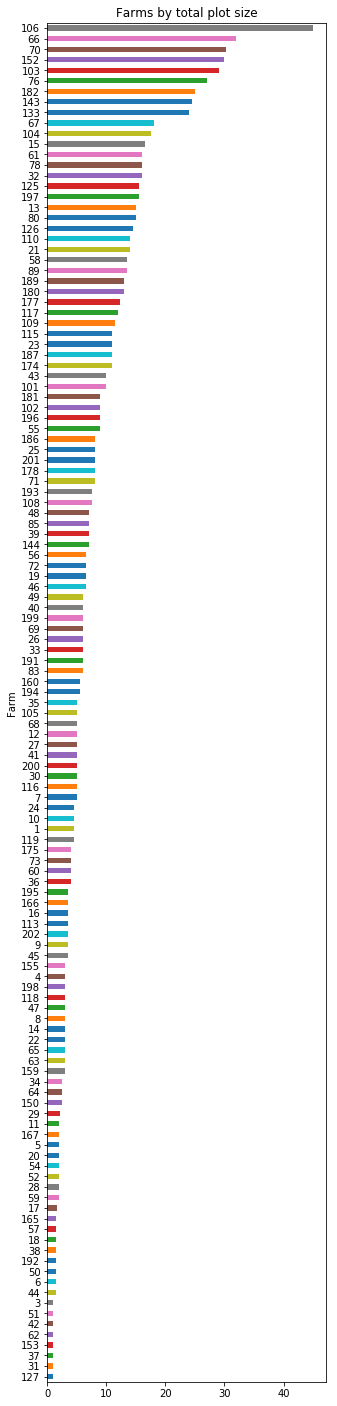

In [27]:
crops_per_farm['plot_area'].sum().sort_values().plot(kind='barh',figsize=(5,25), title='Farms by total plot size')